In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('C:/Users/qq/Desktop/football data premier league/final_dataset.csv',encoding='windows-1252')

In [3]:
data = data[data.MW > 3]

In [4]:
#เลือก Features (HTGD, ATGD, HTP, ATP, HM1, HM2, HM3, AM1, AM2, AM3, DiffFormPts, DiffLP) และ target(FTR) ที่จะใช้ป้อนโมเดล
features_labels = data[['FTR', 'HTGD','ATGD','HTP','ATP','HM1', 'HM2', 'HM3', 
                        'AM1', 'AM2', 'AM3','DiffFormPts','DiffLP']]
features_labels.tail(10).to_csv('C:/Users/qq/Desktop/football data premier league/feature.csv')

In [5]:
#ไว้ใช้สร้าง graph

# จำนวนการแข่งทั้งหมดจาก dataset
n_matches = data.shape[0]

# Calculate number of features. -1 because we are saving one as the target variable (win/lose/draw)
n_features = data.shape[1] - 1

# คำนวณหาจำนวนชนะของทีมเจ้าบ้าน
n_homewins = len(data[data.FTR == 'H'])

# คำนวณหาจำนวนชนะของทีมเยือน
n_awaywins = len(data[data.FTR == 'A'])

#คำนวณหาจำนวนที่เสมอ
n_drawn = len(data[data.FTR == 'D'])

win_rateH = (float(n_homewins) / (n_matches)) * 100

win_rateA = (float(n_awaywins) / (n_matches)) * 100

drawn_rate = (float(n_drawn) / (n_matches)) * 100

print ("Total number of matches: {}".format(n_matches))
print ("Number of features: {}".format(n_features))
print ("Number of matches won by home team: {}".format(n_homewins))
print ("Win rate of home team: {:.2f}%".format(win_rateH))
print ("Number of matches won by away team: {}".format(n_awaywins))
print ("Win rate of away team: {:.2f}%".format(win_rateA))
print ("Drawn rate:  {:.2f}%".format(drawn_rate))

import matplotlib.pyplot as plt
#plot piechart จากข้อมูลทั้งหมด เพื่อหา จำนวน เจ้าบ้านชนะ เสมอ ทีมเยือนชนะ
label = ("HomeWon","Drawn","AwayWon")
value = (win_rateH,win_rateA,drawn_rate)
plt.pie(value,labels=label,startangle=90,autopct="%1.2f%%",explode=(0,0.1,0))

Total number of matches: 6300
Number of features: 29
Number of matches won by home team: 2933
Win rate of home team: 46.56%
Number of matches won by away team: 1755
Win rate of away team: 27.86%
Drawn rate:  25.43%


([<matplotlib.patches.Wedge at 0x986afd0>,
 [Text(-1.09384,0.116256,'HomeWon'),
  Text(0.740262,-0.944464,'Drawn'),
  Text(0.789193,0.766273,'AwayWon')],
 [Text(-0.59664,0.0634125,'46.63%'),
  Text(0.43182,-0.550937,'27.90%'),
  Text(0.430469,0.417967,'25.47%')])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009A0E668>,
      dtype=object)

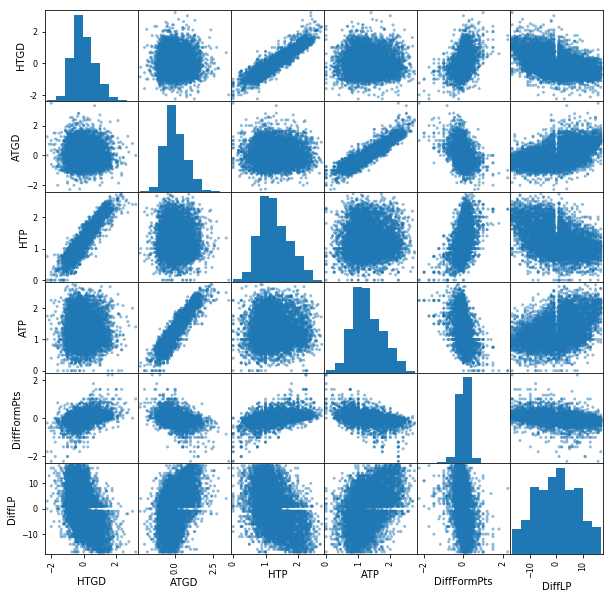

In [6]:
from pandas.plotting import scatter_matrix
scatter_matrix(features_labels[['HTGD','ATGD','HTP','ATP','DiffFormPts','DiffLP']],figsize=(10,10), grid=True)

In [7]:
#แยก Features และ Label ออกจากกัน
X_all = features_labels.drop(['FTR'],1)
y_all = features_labels['FTR']

In [8]:
#แปลง features ที่ไม่ใช่ตัวเลข ที่เป็น category อย่าง เช่น HM1 ซึ่งมีค่าอยู่ 3 ประเภท (W, D, L) โดยเทคนิค one-hot-embed
X_all.HM1 = X_all.HM1.astype('str')
X_all.HM2 = X_all.HM2.astype('str')
X_all.HM3 = X_all.HM3.astype('str')
X_all.AM1 = X_all.AM1.astype('str')
X_all.AM2 = X_all.AM2.astype('str')
X_all.AM3 = X_all.AM3.astype('str')

#we want continous vars that are integers for our input data, so lets remove any categorical vars
def preprocess_features(X):
    ''' Preprocesses the football data and converts catagorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
                    
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
X_all.tail()

,HTGD,ATGD,HTP,ATP,HM1_D,HM1_L,HM1_W,HM2_D,HM2_L,HM2_W,...,AM1_L,AM1_W,AM2_D,AM2_L,AM2_W,AM3_D,AM3_L,AM3_W,DiffFormPts,DiffLP
6835,-0.289474,0.710526,1.078947,1.842105,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,-0.184211,17.0
6836,-0.473684,2.052632,0.947368,2.552632,0,0,1,1,0,0,...,0,1,1,0,0,0,0,1,0.000000,5.0
6837,-0.710526,-0.894737,0.868421,0.789474,0,1,0,0,1,0,...,1,0,1,0,0,1,0,0,-0.052632,2.0
6838,0.973684,-0.078947,1.947368,1.236842,0,0,1,0,1,0,...,0,1,0,1,0,0,1,0,0.078947,-10.0
6839,-0.578947,-0.315789,1.026316,1.289474,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,-0.078947,4.0


In [9]:
# 2000/01–2015/16 สำหรับ Train และ 2016/17 เป็น Test มีทั้งหมด 6300
X_train = X_all[:5920]
y_train = y_all[:5920]
X_test = X_all[5920:6290]
y_test = y_all[5920:6290]
X_predict = X_all[6290:]#ค่าเดิมจากตัวอย่าง 5950 (นัดที่ 6290 = วันที่ 13/5/2018) เมื่อเปลี่ยนค่าจาก10 นัดหลังสุด(10 นัดสุดท้ายตามตารางที่มีข้อมูลทั้งหมด 6300 rows -10)
#X_train
#X_test.tail()
#X_predict
y_train.tail()

6425    D
6426    D
6427    A
6428    H
6429    H
Name: FTR, dtype: object

In [10]:
#การ Standardizing ข้อมูลให้อยู่ในสเกลเดียวกันเพื่อประสิทธิภาพในการเทรนโมเดล โดยใช้ฟังก์ชัน StandardScaler() ใน scikit-learn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
mask = ('HTGD','ATGD','HTP','ATP','DiffFormPts','DiffLP')

In [11]:
X_train.loc[:, mask] = scaler.fit_transform(X_train.loc[:, mask])
X_test.loc[:, mask] = scaler.transform(X_test.loc[:, mask])
X_predict.loc[:, mask] = scaler.transform(np.isnan(X_predict.loc[:, mask]))

scaler.mean_

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


array([-0.00698625,  0.01198584,  1.26975763,  1.28278813, -0.01227094,
        0.00777027])

In [12]:
#สร้างฟังก์ชันเพื่อความสะดวกในการ Train, Test และ Evaluate แต่ละ Model โดยจะใช้ F1 score และ Accuracy ในการวัดผลความแม่นยำของ Model
from time import time 
from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    
    end = time()
    # Print and return results
    print("Made predictions in {:.4f} seconds.".format(end - start))
    return f1_score(target, y_pred, average='macro'), sum(target == y_pred) / float(len(y_pred))


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    f1, acc = predict_labels(clf, X_train, y_train)
    print(f1, acc)
    print("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
    f1, acc = predict_labels(clf, X_test, y_test)
    print(f1, acc)
    print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc)) 

#model ที่ใช้ในการทำนายแบบ decision tree
import xgboost as xgb
#ผลลัพธ์ ขึ้นอยู่กับจำนวนค่าที่เป็นไปได้
#Logistic Regression is used when response variable is categorical in nature.
from sklearn.linear_model import LogisticRegression
#A random forest เป็นตัวประมาณข้อมูลที่เหมาะกับการจำแนกประเภทแบบ decision tree 
#on various sub-samples of the dataset and use averaging to improve the predictive 
#accuracy and control over-fitting.
from sklearn.svm import SVC

clf_A = LogisticRegression(random_state = 42)# Initialize the three models (XGBoost is initialized later)
clf_B = SVC(random_state = 912, kernel='rbf')
clf_C = xgb.XGBClassifier(seed = 82)#Boosting สร้างการคาดเดาที่มีความแม่นยำสูง by combining rough and moderately inaccurate rules-of-thumb

train_predict(clf_A, X_train, y_train, X_test, y_test)
print('')
train_predict(clf_B, X_train, y_train, X_test, y_test)
print('')
train_predict(clf_C, X_train, y_train, X_test, y_test)
print('')


Training a LogisticRegression using a training set size of 5920. . .
Trained model in 0.1560 seconds
Made predictions in 0.0920 seconds.
0.43422408894771136 0.541722972972973
F1 score and accuracy score for training set: 0.4342 , 0.5417.
Made predictions in 0.0010 seconds.
0.44558623059961144 0.5513513513513514
F1 score and accuracy score for test set: 0.4456 , 0.5514.

Training a SVC using a training set size of 5920. . .
Trained model in 2.2820 seconds
Made predictions in 1.1710 seconds.
0.42696398629992327 0.5535472972972973
F1 score and accuracy score for training set: 0.4270 , 0.5535.
Made predictions in 0.0990 seconds.
0.3972657136373951 0.5378378378378378
F1 score and accuracy score for test set: 0.3973 , 0.5378.

Training a XGBClassifier using a training set size of 5920. . .
Trained model in 1.0300 seconds
Made predictions in 0.0560 seconds.
0.49470204672424495 0.5822635135135135
F1 score and accuracy score for training set: 0.4947 , 0.5823.
Made predictions in 0.0050 seconds.

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [22]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
parameters = { 'learning_rate' : [0.1],
               'n_estimators' : [40],
               'max_depth': [3],
               'min_child_weight': [3],
               'gamma':[0.4],
               'subsample' : [0.8],
               'colsample_bytree' : [0.8],
               'scale_pos_weight' : [1],
               'reg_alpha':[1e-5]
             } 

clf = xgb.XGBClassifier(seed=2)
f1_scorer = make_scorer(f1_score, average='macro')
grid_obj = GridSearchCV(clf,
                        scoring=f1_scorer,
                        param_grid=parameters,
                        cv=5)
grid_obj = grid_obj.fit(X_train,y_train)
clf = grid_obj.best_estimator_
print(clf)

# Report the final F1 score for training and testing after parameter tuning
f1, acc = predict_labels(clf, X_train, y_train)
print("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
f1, acc = predict_labels(clf, X_test, y_test)
print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The tr

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=3, missing=None,
       n_estimators=40, n_jobs=1, nthread=None, objective='multi:softprob',
       random_state=0, reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1,
       seed=2, silent=True, subsample=0.8)
Made predictions in 0.0220 seconds.
F1 score and accuracy score for training set: 0.4590 , 0.5625.
Made predictions in 0.0020 seconds.
F1 score and accuracy score for test set: 0.4530 , 0.5568.


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [32]:
from sklearn.externals import joblib
joblib.dump(clf, 'grid_search_clf.pkl')
predict = clf.predict(X_predict)
X_predict

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,HTGD,ATGD,HTP,ATP,HM1_D,HM1_L,HM1_W,HM2_D,HM2_L,HM2_W,...,AM1_L,AM1_W,AM2_D,AM2_L,AM2_W,AM3_D,AM3_L,AM3_W,DiffFormPts,DiffLP
6830,0.010351,-0.017795,-2.715891,-2.762338,0,1,0,1,0,0,...,0,1,0,1,0,0,1,0,0.042957,-0.000966
6831,0.010351,-0.017795,-2.715891,-2.762338,0,0,1,0,0,1,...,0,1,0,0,1,1,0,0,0.042957,-0.000966
6832,0.010351,-0.017795,-2.715891,-2.762338,1,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0.042957,-0.000966
6833,0.010351,-0.017795,-2.715891,-2.762338,0,1,0,1,0,0,...,1,0,0,0,1,1,0,0,0.042957,-0.000966
6834,0.010351,-0.017795,-2.715891,-2.762338,1,0,0,0,1,0,...,0,1,0,1,0,1,0,0,0.042957,-0.000966
6835,0.010351,-0.017795,-2.715891,-2.762338,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0.042957,-0.000966
6836,0.010351,-0.017795,-2.715891,-2.762338,0,0,1,1,0,0,...,0,1,1,0,0,0,0,1,0.042957,-0.000966
6837,0.010351,-0.017795,-2.715891,-2.762338,0,1,0,0,1,0,...,1,0,1,0,0,1,0,0,0.042957,-0.000966
6838,0.010351,-0.017795,-2.715891,-2.762338,0,0,1,0,1,0,...,0,1,0,1,0,0,1,0,0.042957,-0.000966
6839,0.010351,-0.017795,-2.715891,-2.762338,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0.042957,-0.000966


In [33]:
predict

array(['A', 'H', 'H', 'H', 'A', 'H', 'H', 'H', 'H', 'D'], dtype=object)

In [34]:
mw = data[-10:][['HomeTeam', 'AwayTeam']]
mw

,HomeTeam,AwayTeam
370,Burnley,Bournemouth
371,Crystal Palace,West Brom
372,Huddersfield,Arsenal
373,Liverpool,Brighton
374,Man United,Watford
375,Newcastle,Chelsea
376,Southampton,Man City
377,Swansea,Stoke
378,Tottenham,Leicester
379,West Ham,Everton


In [35]:
mw['FTR'] = clf.predict(X_predict)
mw

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,HomeTeam,AwayTeam,FTR
370,Burnley,Bournemouth,A
371,Crystal Palace,West Brom,H
372,Huddersfield,Arsenal,H
373,Liverpool,Brighton,H
374,Man United,Watford,A
375,Newcastle,Chelsea,H
376,Southampton,Man City,H
377,Swansea,Stoke,H
378,Tottenham,Leicester,H
379,West Ham,Everton,D


In [36]:
data = pd.read_csv('C:/Users/qq/Desktop/football data premier league/data/2017-2018/E0.csv')

In [37]:
mw.to_csv('C:/Users/qq/Desktop/football data premier league/prediction_result.csv',index=False)

In [42]:
Realresult = data[-10:]['FTR']
Realresult

370    A
371    H
372    A
373    H
374    H
375    H
376    A
377    A
378    H
379    H
Name: FTR, dtype: object

In [183]:
Real = np.array(Realresult)

In [184]:
Real

array(['A', 'H', 'A', 'H', 'H', 'H', 'A', 'A', 'H', 'H'], dtype=object)

In [185]:
predict

array(['A', 'H', 'H', 'H', 'A', 'H', 'H', 'H', 'H', 'D'], dtype=object)

In [186]:
a = Real == predict

In [187]:
a

array([ True,  True, False,  True, False,  True, False, False,  True,
       False])

In [188]:
#คำนวณรอบแรกกับข้อมูล 10 ตัว true 5 false 5 คำนวนครั้งที่2 กับข้อมูล 20 ตัวสุดท้ายปี 2018  true 7 false 13 คำนวนครั้งที่3 กับข้อมูล 10 ตัว ใน ปี2016 true 5 false 5
true = 0
false= 0
for i in range(len(a)):
    if a[i] == True:
        true +=1
    elif a[i] == False:
        false +=1

In [189]:
true

5

In [190]:
false

5

In [191]:
PredictTrue = (true/10) * 100

In [192]:
PredictFalse = (false/10) * 100

In [193]:
print(PredictTrue)
print(PredictFalse)

50.0
50.0
